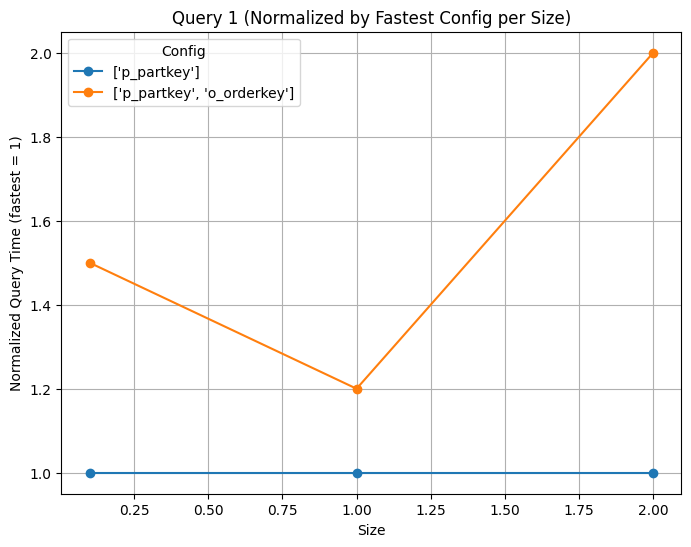

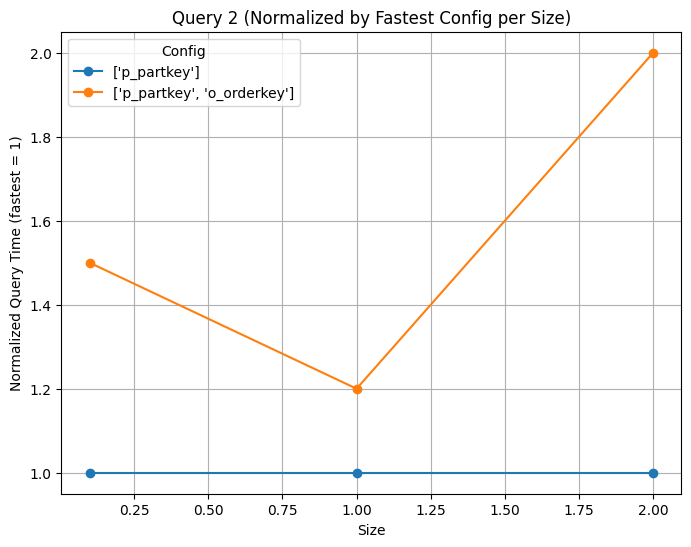

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

RESULTS_PATH = "../results/tpch/testy/"

# Read the CSV file (make sure to replace 'dummy.csv' with your file path if needed)
df = pd.read_csv(RESULTS_PATH + 'testy.csv')
df['size'] = pd.to_numeric(df['size'])

# For each query and each data size, find the fastest config's total query time,
# and then compute normalized query time.
df['min_time'] = df.groupby(['query', 'size'])['total query time'].transform('min')
df['normalized_time'] = df['total query time'] / df['min_time']

# Get unique queries
queries = df['query'].unique()

for query in queries:
    # Filter data for the current query
    df_query = df[df['query'] == query]
    
    plt.figure(figsize=(8, 6))
    
    # Get unique configs for this query
    configs = df_query['config'].unique()
    
    for config in configs:
        # Filter data for the current config
        df_config = df_query[df_query['config'] == config].copy()
        # Sort by size so that the line connects points in order
        df_config = df_config.sort_values(by='size')
        
        # Plot normalized query time vs. size
        plt.plot(df_config['size'], df_config['normalized_time'], marker='o', label=config)
    
    plt.title(f'Query {query} (Normalized by Fastest Config per Size)')
    plt.xlabel('Size')
    plt.ylabel('Normalized Query Time (fastest = 1)')
    plt.legend(title='Config')
    plt.grid(True)
    plt.show()

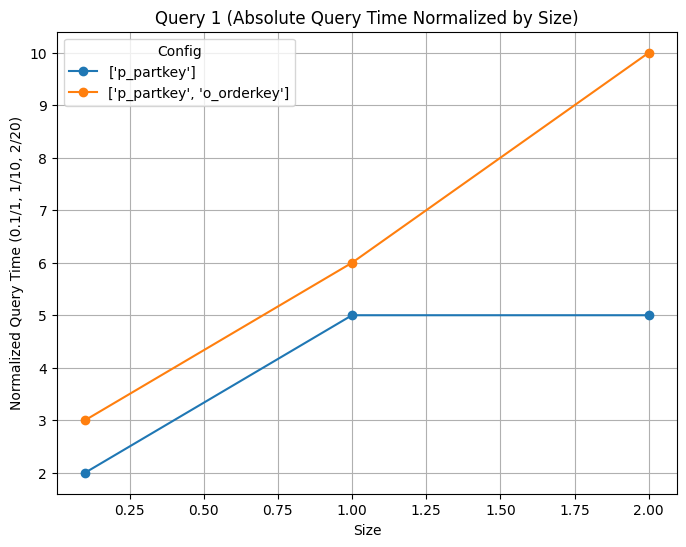

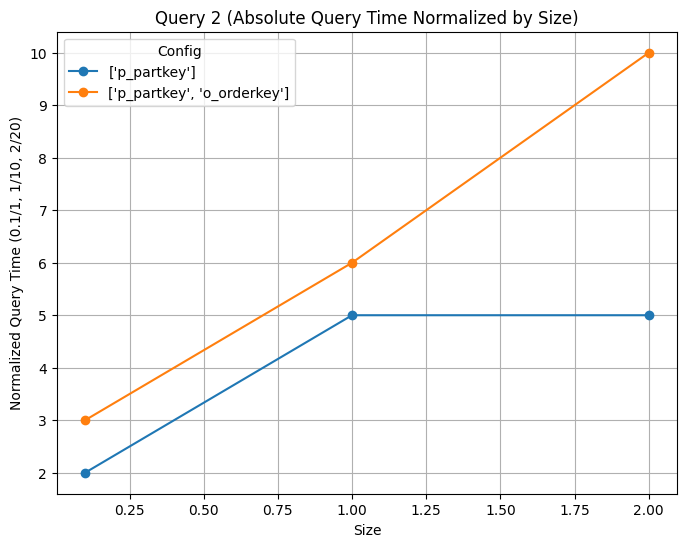

In [9]:
# Ensure 'size' is numeric
df['size'] = pd.to_numeric(df['size'])

# Define normalization factors for each size
size_norm_factors = {0.1: 1, 1: 10, 2: 20}

# Create a new column with the normalized query time.
# For each row, the total query time is divided by the corresponding factor.
df['normalized_time_by_size'] = df.apply(lambda row: row['total query time'] / size_norm_factors[row['size']], axis=1)

# Get unique queries to loop over
queries = df['query'].unique()

for query in queries:
    # Filter data for the current query
    df_query = df[df['query'] == query]
    
    plt.figure(figsize=(8, 6))
    
    # Get unique configs for this query
    configs = df_query['config'].unique()
    
    for config in configs:
        # Filter data for the current config and sort by size
        df_config = df_query[df_query['config'] == config].sort_values(by='size')
        
        # Plot normalized query time vs. size with markers
        plt.plot(df_config['size'], df_config['normalized_time_by_size'], marker='o', label=config)
    
    plt.title(f'Query {query} (Absolute Query Time Normalized by Size)')
    plt.xlabel('Size')
    plt.ylabel('Normalized Query Time (0.1/1, 1/10, 2/20)')
    plt.legend(title='Config')
    plt.grid(True)
    plt.show()
